<center><h1>Customer Acquisition : Credit Card Business</h1></center>

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [111]:
demo_graph_df = pd.read_csv("Demographic data.csv")
credit_bureau_df = pd.read_csv("Credit Bureau data.csv")

In [80]:
demo_graph_df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [81]:
credit_bureau_df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [83]:
print(demo_graph_df.shape)
demo_graph_df.info()

(71295, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage

In [115]:
print(credit_bureau_df.shape)
credit_bureau_df.info()

(71295, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null i

## Data Cleaning

Change column name for better readability as well as easier to access.

In [316]:
col = {'Marital Status (at the time of application)' : 'Marital Status',
       'No of months in current residence' : 'Months in Current Residence',
       'No of months in current company' : 'Months in Current Company',
       'Profession ' : 'Profession',
       'Performance Tag' : 'Defaulter'      
      }
demo_graph_df.rename(columns=col, inplace=True)

In [120]:
col = {'No of times 30 DPD or worse in last 6 months' : '30 DPD in 6M',
       'No of times 60 DPD or worse in last 6 months' : '60 DPD in 6M',
       'No of times 90 DPD or worse in last 6 months' : '90 DPD in 6M',
       'No of times 30 DPD or worse in last 12 months' : '30 DPD in 12M',
       'No of times 60 DPD or worse in last 12 months' : '60 DPD in 12M',
       'No of times 90 DPD or worse in last 12 months' : '90 DPD in 12M',
       'Avgas CC Utilization in last 12 months' : 'CC Utilization in 12M',
       'No of trades opened in last 6 months' : 'Trades Opened in 6M',
       'No of trades opened in last 12 months' : 'Trades Opened in 12M',
       'No of PL trades opened in last 6 months' : 'PL Trades Opened in 6M',
       'No of PL trades opened in last 12 months' : 'PL Trades Opened in 12M',
       'No of Inquiries in last 6 months (excluding home & auto loans)' : 'Inquiries in 6M',
       'No of Inquiries in last 12 months (excluding home & auto loans)' : 'Inquiries in 12M',
       'Performance Tag' : 'Defaulter'       
      }
credit_bureau_df.rename(columns=col, inplace=True)

In [121]:
credit_bureau_df.isnull().sum() / credit_bureau_df.index.size * 100

Application ID                0.000000
90 DPD in 6M                  0.000000
60 DPD in 6M                  0.000000
30 DPD in 6M                  0.000000
90 DPD in 12M                 0.000000
60 DPD in 12M                 0.000000
30 DPD in 12M                 0.000000
CC Utilization in 12M         1.483975
Trades Opened in 6M           0.001403
Trades Opened in 12M          0.000000
PL Trades Opened in 6M        0.000000
PL Trades Opened in 12M       0.000000
Inquiries in 6M               0.000000
Inquiries in 12M              0.000000
Presence of open home loan    0.381513
Outstanding Balance           0.381513
Total No of Trades            0.000000
Presence of open auto loan    0.000000
Defaulter                     1.998738
dtype: float64

In [122]:
demo_graph_df.isnull().sum() / demo_graph_df.index.size * 100

Application ID                 0.000000
Age                            0.000000
Gender                         0.002805
Marital Status                 0.008416
No of dependents               0.004208
Income                         0.000000
Education                      0.166912
Profession                     0.019637
Type of residence              0.011221
Months in Current Residence    0.000000
Months in Current Company      0.000000
Defaulter                      1.998738
dtype: float64

**2%** missing values in **Defaulter** which is out target/dependend variable.<BR>
We should not impute data for traget variable, so let's drop these rows.

In [123]:
demo_graph_df = demo_graph_df[~demo_graph_df['Defaulter'].isnull()]
credit_bureau_df = credit_bureau_df[~credit_bureau_df['Defaulter'].isnull()]

In [124]:
demo_graph_df.isnull().sum()

Application ID                   0
Age                              0
Gender                           2
Marital Status                   6
No of dependents                 3
Income                           0
Education                      118
Profession                      13
Type of residence                8
Months in Current Residence      0
Months in Current Company        0
Defaulter                        0
dtype: int64

**118** missing values in Education column which is approx **0.17%**. 

In [125]:
demo_graph_df['Education'].value_counts()

Professional    24386
Masters         23481
Bachelor        17302
Phd              4464
Others            119
Name: Education, dtype: int64

We can either drop records with missing education detail or can impute value 'Others'.<BR>
Let's impute 'Others' value instead of dropping records.

In [126]:
demo_graph_df['Education'] = demo_graph_df['Education'].fillna(value='Others')

Will drop other missing value rows.

In [127]:
demo_graph_df.dropna(inplace=True)

In [128]:
credit_bureau_df.isnull().sum()

Application ID                   0
90 DPD in 6M                     0
60 DPD in 6M                     0
30 DPD in 6M                     0
90 DPD in 12M                    0
60 DPD in 12M                    0
30 DPD in 12M                    0
CC Utilization in 12M         1023
Trades Opened in 6M              1
Trades Opened in 12M             0
PL Trades Opened in 6M           0
PL Trades Opened in 12M          0
Inquiries in 6M                  0
Inquiries in 12M                 0
Presence of open home loan     272
Outstanding Balance            272
Total No of Trades               0
Presence of open auto loan       0
Defaulter                        0
dtype: int64

In [129]:
credit_bureau_df[(credit_bureau_df['Outstanding Balance'].isnull()) & (credit_bureau_df['Defaulter'] == 1)]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
13743,785171954,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
15121,130726109,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
17833,404543089,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
18333,746044170,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
19989,260054189,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
23109,415232032,0,0,0,0,0,0,NaN,0.0,0,0,0,1,2,NaN,NaN,0,0,1.0
24229,117453172,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
42673,51310669,0,0,0,0,0,0,NaN,0.0,0,0,0,2,2,NaN,NaN,0,0,1.0


In [130]:
credit_bureau_df[(credit_bureau_df['Outstanding Balance'].isnull())].describe()

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
count,2.720000e+02,272.0,272.0,272.0,272.0,272.0,272.0,0.0,272.0,272.0,272.0,272.0,272.000000,272.000000,0.0,0.0,272.0,272.0,272.000000
mean,4.887308e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.183824,1.224265,NaN,NaN,0.0,0.0,0.029412
std,2.915627e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.503892,0.652330,NaN,NaN,0.0,0.0,0.169269
min,2.147690e+06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
25%,2.347238e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
50%,5.207258e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
75%,7.371681e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
max,9.978773e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.000000,5.000000,NaN,NaN,0.0,0.0,1.000000


**Average credit card utilization** is null menas no credit card issued to that customer so we can replace null with Zero.<BR>
Same case with **Presence of open home loan** & **Outstanding Balance**.

In [131]:
credit_bureau_df = credit_bureau_df.fillna(value=0)

In [426]:
demo_graph_df[demo_graph_df['Application ID'].isin(demo_graph_df[demo_graph_df['Application ID'].duplicated()]['Application ID'])]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


In [427]:
credit_bureau_df[credit_bureau_df['Application ID'].isin(credit_bureau_df[credit_bureau_df['Application ID'].duplicated()]['Application ID'])]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0


In [132]:
credit_bureau_df.shape

(69870, 19)

In [133]:
demo_graph_df.shape

(69839, 12)

After data clean activity, application id in both data are not common.<BR>
Will sync both data set based on application id for further analysis.

In [134]:
credit_bureau_df = credit_bureau_df[credit_bureau_df['Application ID'].isin(demo_graph_df['Application ID'])]
demo_graph_df = demo_graph_df[demo_graph_df['Application ID'].isin(credit_bureau_df['Application ID'])]

## EDA

### Univariate & Bivariate Analysis

In [382]:
def PlotNumericalFeatures(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(18, 4))
    
    #Plot All Records
    ax = sns.distplot(df[col], ax = axes[0])
    ax.set_title(col)
    
    #Plot Only Non Defaulters
    ax = sns.distplot(df[df['Defaulter']==0][col],ax = axes[1])
    ax.set_title('Non Defaulter')
    
    #Plot Only Defaulters
    ax = sns.distplot(df[df['Defaulter']==1][col], ax = axes[2])
    ax.set_title('Defaulter')

    #Plot Defauletr vs Non-defaulter
    ax = sns.boxplot(x='Defaulter', y=col, data=df, ax = axes[3])
    ax = sns.stripplot(x='Defaulter', y=col, data=df, jitter=True, ax = axes[3])
    ax.set_title('Non Defaulter Vs Defaulter')
    plt.show()

In [350]:
def PlotCategoricalFeatures(df, col):
    No_of_Application = df.groupby(col)['Defaulter'].count().reset_index(name = 'No of Application')
    No_of_Defaulter = df[df['Defaulter']==1].groupby(col)['Defaulter'].count().reset_index(name = 'No of Defaulter')
    tempDf = No_of_Application.merge(No_of_Defaulter, how='left', on=col)
    tempDf['No of Defaulter'].fillna(0, inplace=True)
    tempDf['Defaulter rate (%)'] = round(100*(tempDf['No of Defaulter']/tempDf['No of Application']), 2)
    tempDf[col] = tempDf[col].astype('category')
    fig = plt.figure(figsize=(15,6))
    
    colOrder = sorted(df[col].unique())
    ax = fig.add_subplot(221)
    sns.countplot(data=df, y=col, hue='Defaulter', ax=ax, order=colOrder)
    ax.set_title(col.capitalize(), fontsize=14)

    ax = fig.add_subplot(222)
    sns.barplot(data=tempDf, y=col, x='Defaulter rate (%)', ax=ax, order=colOrder)
    ax.set_title(col.capitalize(), fontsize=14)
    ax.set_ylabel("")
    ax.set_yticklabels("")

    ax = fig.add_subplot(223)
    bbox=[0, 0, 1.5, 0.7]
    mpl_table = ax.table(cellText = tempDf.values, bbox=bbox, colLabels=tempDf.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(14)
    ax.axis('off')
    plt.show()

In [352]:
demo_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69839 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                 69839 non-null int64
Age                            69839 non-null int64
Gender                         69839 non-null object
Marital Status                 69839 non-null object
No of dependents               69839 non-null float64
Income                         69839 non-null float64
Education                      69839 non-null object
Profession                     69839 non-null object
Type of residence              69839 non-null object
Months in Current Residence    69839 non-null int64
Months in Current Company      69839 non-null int64
Defaulter                      69839 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.4+ MB


In [136]:
credit_bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69839 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                69839 non-null int64
90 DPD in 6M                  69839 non-null int64
60 DPD in 6M                  69839 non-null int64
30 DPD in 6M                  69839 non-null int64
90 DPD in 12M                 69839 non-null int64
60 DPD in 12M                 69839 non-null int64
30 DPD in 12M                 69839 non-null int64
CC Utilization in 12M         69839 non-null float64
Trades Opened in 6M           69839 non-null float64
Trades Opened in 12M          69839 non-null int64
PL Trades Opened in 6M        69839 non-null int64
PL Trades Opened in 12M       69839 non-null int64
Inquiries in 6M               69839 non-null int64
Inquiries in 12M              69839 non-null int64
Presence of open home loan    69839 non-null float64
Outstanding Balance           69839 non-null float64
Total No of Trades            69839 non-null int64
Presence of open

Credit bureau data contains all numerical feature variable, where as Demographic data have some categorical feature variable.  

Analyze **Demographic** data.

In [153]:
demo_graph_df[demo_graph_df.columns[~demo_graph_df.columns.isin(['Application ID', 'Defaulter'])]].head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company
0,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56
1,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46
2,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49
3,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53
4,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43


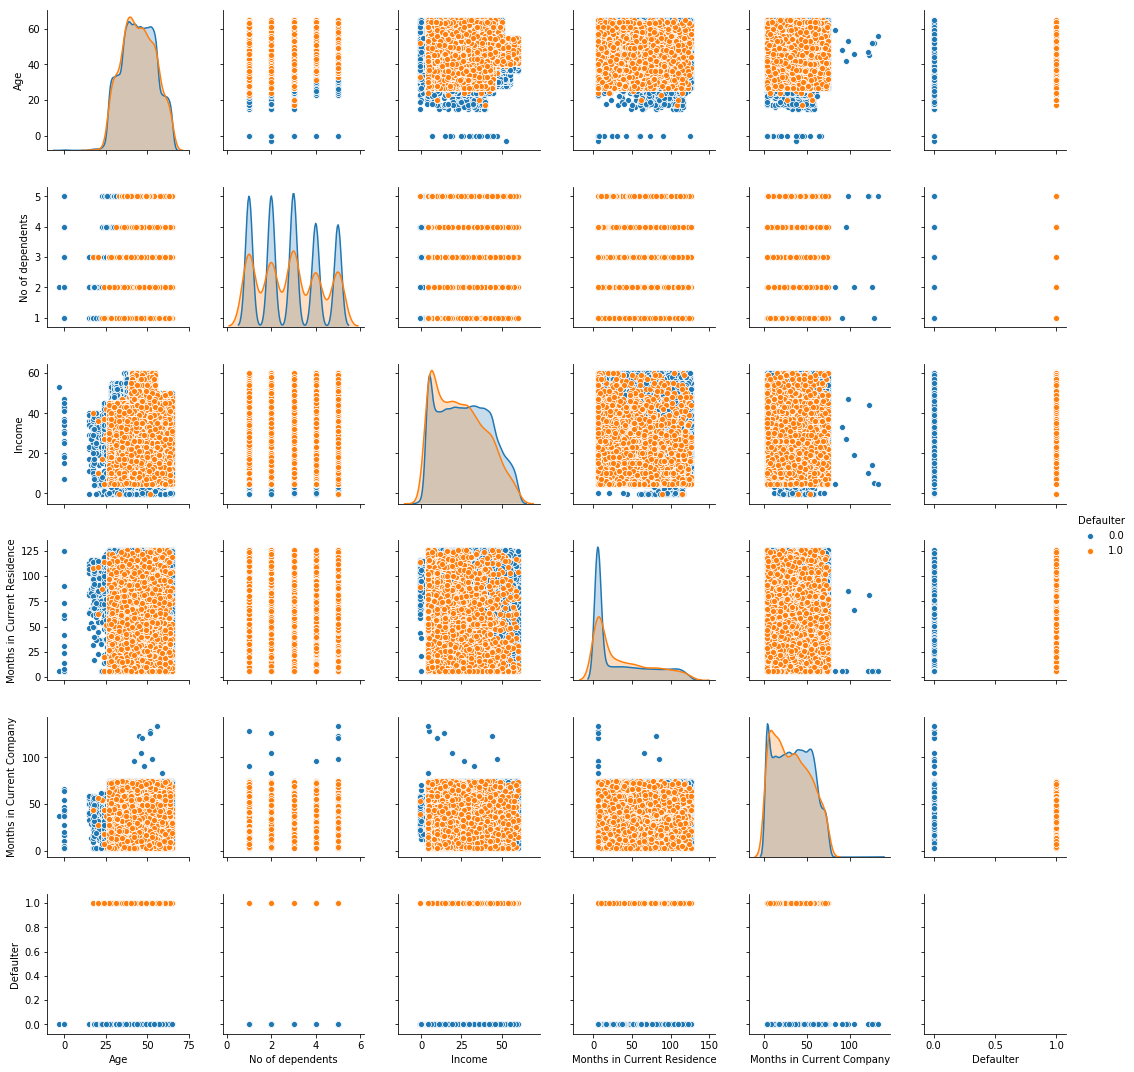

In [156]:
sns.pairplot(data=demo_graph_df[demo_graph_df.columns[~demo_graph_df.columns.isin(['Application ID'])]], hue='Defaulter')
plt.show()

In [325]:
demo_graph_df.describe()

,Application ID,Age,No of dependents,Income,Months in Current Residence,Months in Current Company,Defaulter
count,6.983900e+04,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000
mean,4.992070e+08,44.998826,2.859606,27.409263,34.605378,34.199817,0.042211
std,2.885504e+08,9.925998,1.385524,15.474305,36.845215,20.351021,0.201073
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485548e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980015e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498488e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


There is an issue with **Age & Income** feature variable, both should have positve values.<BR>
**Months in Current Residence** have big difference in **Mean (34.6) and Median(10)**.

**Defaulter** : Check for class imbalance 

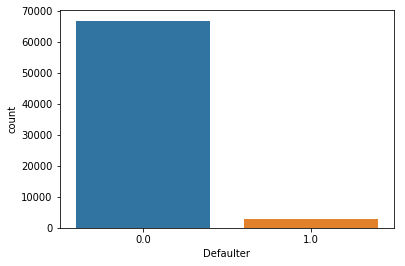

0.0    95.778863
1.0     4.221137
Name: Defaulter, dtype: float64

In [348]:
#Data imbalance check on Target Variable
sns.countplot(data=demo_graph_df, x='Defaulter')
plt.show()
demo_graph_df['Defaulter'].value_counts() / demo_graph_df.index.size*100

**Age**

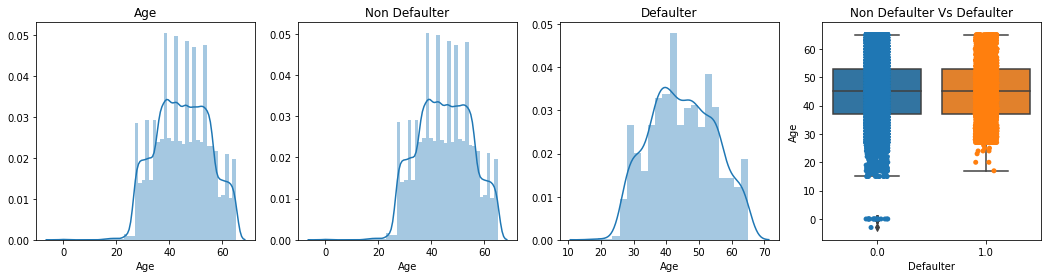

In [377]:
PlotNumericalFeatures(demo_graph_df, 'Age')

In [172]:
demo_graph_df[demo_graph_df['Age'] <= 10]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter
9111,964427213,0,M,Married,3.0,19.0,Professional,SE_PROF,Rented,6,41,0.0
16315,634180637,-3,M,Married,2.0,53.0,Masters,SE_PROF,Rented,6,37,0.0
20752,590303560,0,M,Married,4.0,31.0,Masters,SE_PROF,Rented,6,47,0.0
29929,492869740,0,M,Single,2.0,18.0,Masters,SE_PROF,Rented,6,66,0.0
34548,932483616,0,M,Married,2.0,42.0,Masters,SE,Rented,6,64,0.0
35606,666398799,0,F,Married,5.0,47.0,Bachelor,SE_PROF,Rented,6,16,0.0
44090,790296430,0,M,Single,4.0,43.0,Professional,SAL,Owned,73,10,0.0
50153,463622314,0,M,Married,3.0,7.0,Masters,SAL,Owned,90,3,0.0
55558,441104387,0,M,Single,2.0,26.0,Professional,SE_PROF,Rented,24,37,0.0
56153,380153306,0,M,Married,4.0,41.0,Bachelor,SAL,Company provided,42,17,0.0


In [171]:
demo_graph_df[demo_graph_df['Age'] <= 10]['Age'].value_counts()

 0    16
-3     1
Name: Age, dtype: int64

**16** applications have 0 as age as well as **1** have negative age which is incorrect.

# TODO : AGE

**Gender**

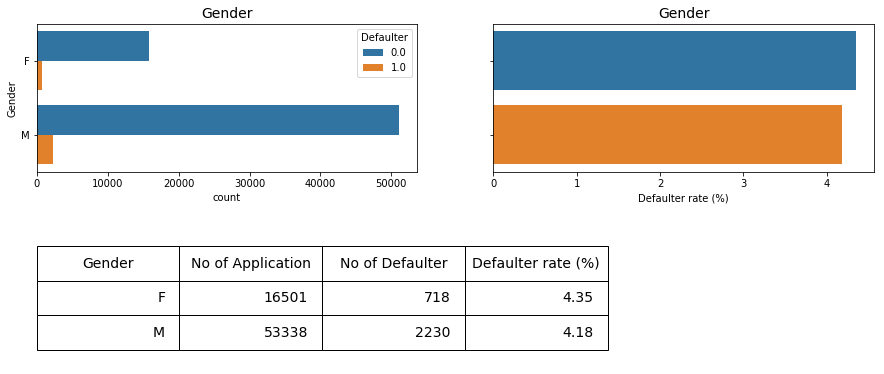

In [320]:
PlotCategoricalFeatures(demo_graph_df, 'Gender')

Though we have more records for **Male** than **Female**, but default rate for both categories are almost same.  

**Marital Status**

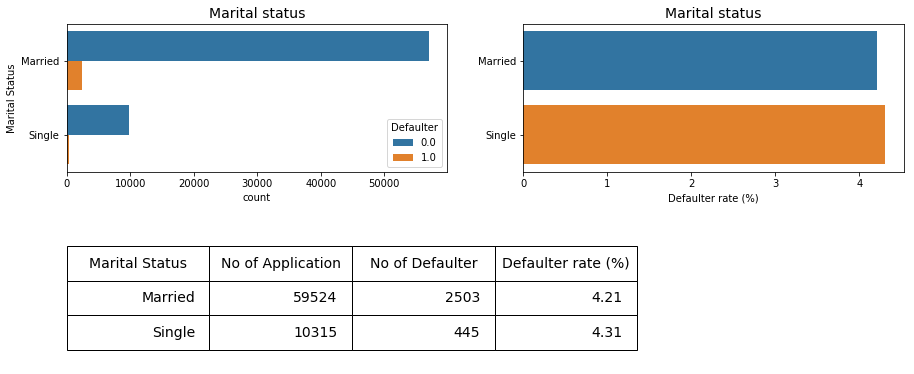

In [309]:
PlotCategoricalFeatures(demo_graph_df, 'Marital Status')

Same as gender, defaulter rate for Married & Single is same.

**No of dependents**

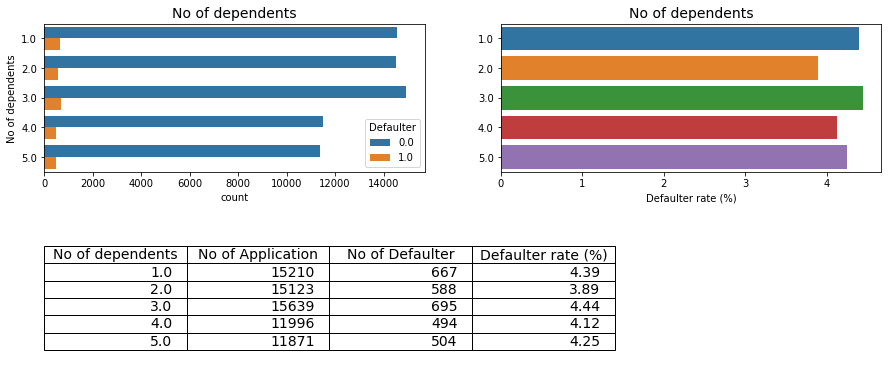

In [310]:
PlotCategoricalFeatures(demo_graph_df, 'No of dependents')

**Income**

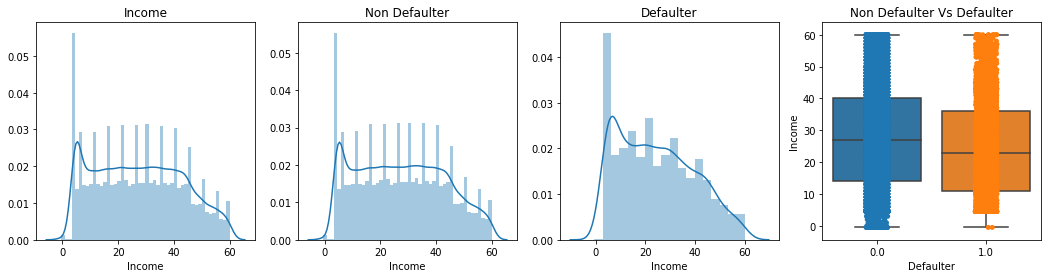

In [378]:
PlotNumericalFeatures(demo_graph_df, 'Income')

In [404]:
demo_graph_df[(demo_graph_df['Income'] <= 0) & (demo_graph_df['Defaulter'] == 1)]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter
1565,861750337,52,M,Married,5.0,-0.5,Bachelor,SAL,Owned,89,53,1.0
3688,341933103,33,M,Married,5.0,-0.5,Professional,SE,Rented,114,39,1.0


In [405]:
demo_graph_df[(demo_graph_df['Income'] <= 0) & (demo_graph_df['Defaulter'] == 0)]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter
964,450723469,34,M,Married,2.0,-0.5,Masters,SAL,Rented,99,57,0.0
1058,24806681,22,M,Single,1.0,-0.5,Masters,SAL,Rented,93,57,0.0
1222,729552057,40,M,Married,3.0,-0.5,Professional,SE_PROF,Rented,113,43,0.0
1270,307736934,15,M,Married,2.0,-0.5,Phd,SAL,Owned,107,58,0.0
1278,805216817,32,M,Married,3.0,-0.5,Professional,SAL,Owned,109,51,0.0
1288,547253197,64,M,Married,5.0,-0.5,Professional,SAL,Rented,108,52,0.0
1343,373963488,48,M,Married,3.0,-0.5,Professional,SAL,Rented,113,57,0.0
1463,60246058,35,M,Married,3.0,-0.5,Professional,SAL,Owned,111,53,0.0
1620,342846642,51,M,Married,3.0,-0.5,Bachelor,SE,Rented,112,58,0.0
1731,671827529,41,M,Married,2.0,-0.5,Masters,SAL,Owned,114,33,0.0


In [330]:
demo_graph_df[demo_graph_df['Income'] <= 0]['Income'].value_counts()

-0.5    81
 0.0    25
Name: Income, dtype: int64

In [403]:
demo_graph_df['Income'].describe(percentiles=[0.01,0.05,0.1])

count    69839.000000
mean        27.409263
std         15.474305
min         -0.500000
1%           4.500000
5%           4.500000
10%          6.000000
50%         27.000000
max         60.000000
Name: Income, dtype: float64

# TODo : Income 

**Education**

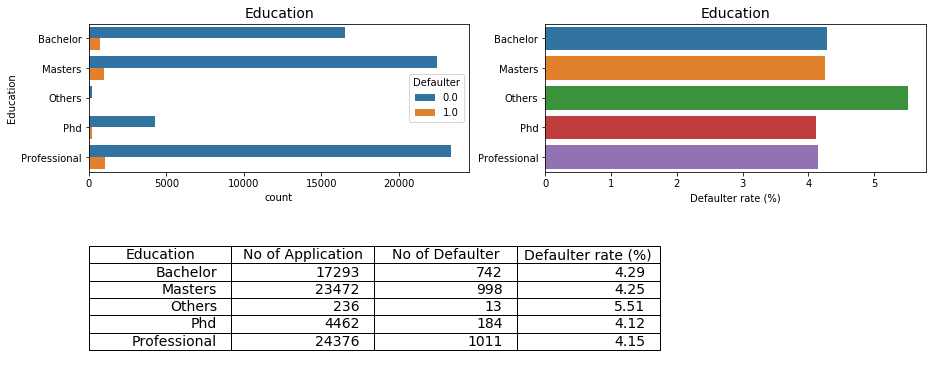

In [317]:
PlotCategoricalFeatures(demo_graph_df, 'Education')

Others category have very less records but have high defaulter rate.

**Type of residence**

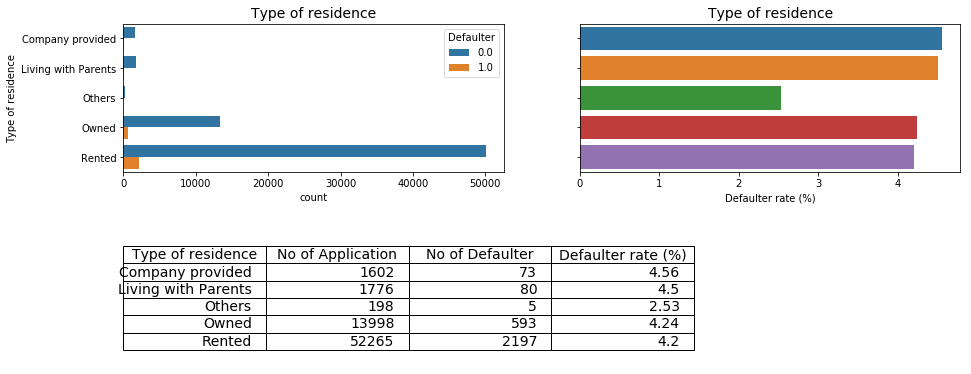

In [321]:
PlotCategoricalFeatures(demo_graph_df, 'Type of residence')

**Months in Current Residence**

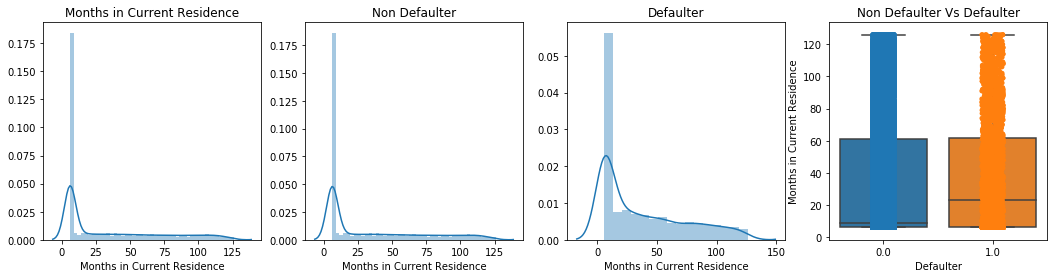

In [379]:
PlotNumericalFeatures(demo_graph_df, 'Months in Current Residence')

**Months in Currrent residence** variable is highly right skewed.

In [337]:
demo_graph_df[demo_graph_df['Months in Current Residence'] <= 0]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company,Defaulter


In [336]:
demo_graph_df['Months in Current Residence'].describe(percentiles=np.arange(0.5,1,0.05))

count    69839.000000
mean        34.605378
std         36.845215
min          6.000000
50%         10.000000
55.0%       19.000000
60.0%       29.000000
65.0%       39.000000
70.0%       50.000000
75.0%       61.000000
80.0%       73.000000
85.0%       85.000000
90.0%       98.000000
95.0%      110.000000
max        126.000000
Name: Months in Current Residence, dtype: float64

# TODO : **Months in Currrent residence** variable is highly right skewed.

**Months in Current Company**

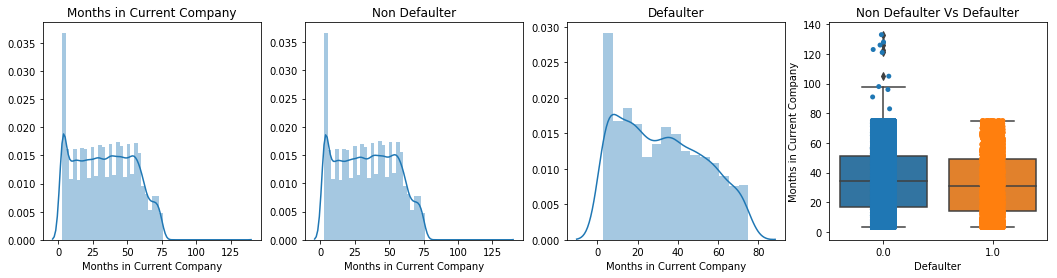

In [380]:
PlotNumericalFeatures(demo_graph_df, 'Months in Current Company')

There are few outliers monstly in non defaulter category.<BR>


# TODO Months in Current Company

Analyze **Credit Bureau** data.

In [353]:
credit_bureau_df[credit_bureau_df.columns[~credit_bureau_df.columns.isin(['Application ID', 'Defaulter'])]].head()

,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [355]:
credit_bureau_df.describe()

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
count,6.983900e+04,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,69839.000000,6.983900e+04,69839.000000,69839.000000,69839.000000
mean,4.992070e+08,0.248887,0.391529,0.523304,0.414682,0.603159,0.733616,28.833703,2.284898,5.784705,1.189421,2.363235,1.757915,3.524993,0.258666,1.248503e+06,8.174745,0.084867,0.042211
std,2.885504e+08,0.505558,0.771682,1.000400,0.763243,1.021481,1.242776,29.506502,2.081924,5.095675,1.352667,2.423713,1.985132,3.611868,0.437905,1.286074e+06,7.153402,0.278685,0.201073
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.485548e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.066305e+05,3.000000,0.000000,0.000000
50%,4.980015e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.727120e+05,6.000000,0.000000,0.000000
75%,7.498488e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.924659e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


**30 DPD in 6M, 60 DPD in 6M & 90 DPD in 6M**

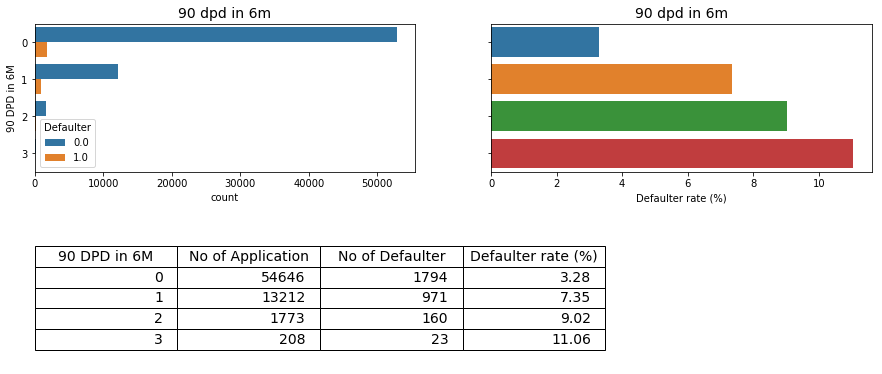

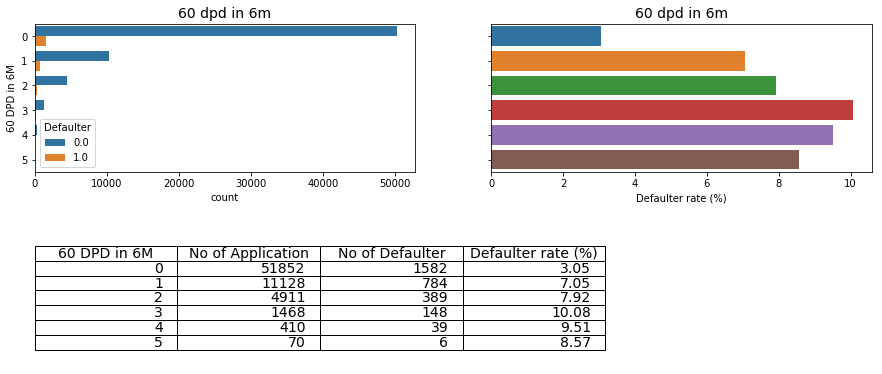

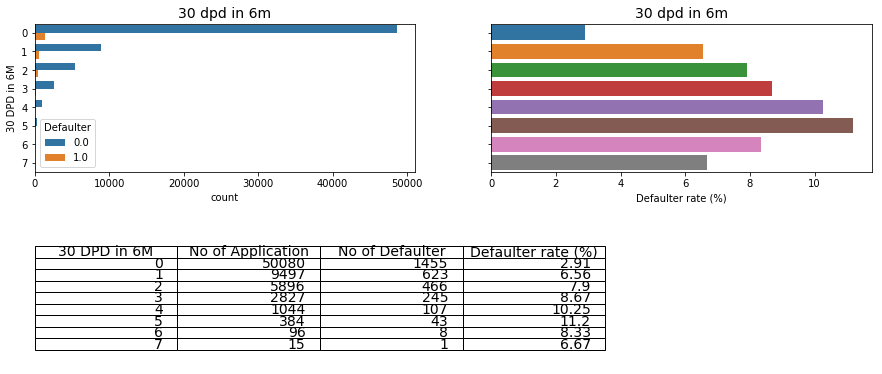

In [406]:
PlotCategoricalFeatures(credit_bureau_df, '90 DPD in 6M')
PlotCategoricalFeatures(credit_bureau_df, '60 DPD in 6M')
PlotCategoricalFeatures(credit_bureau_df, '30 DPD in 6M')

Defaultor rate increase as number of pay due days increases.

**30 DPD in 12M, 60 DPD in 12M & 90 DPD in 12M**

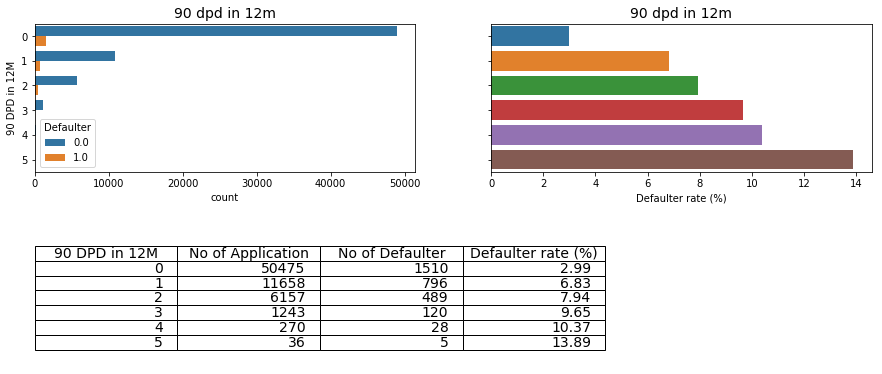

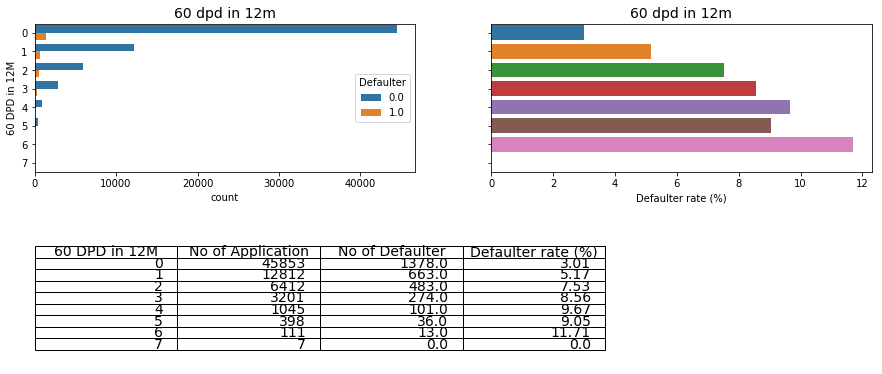

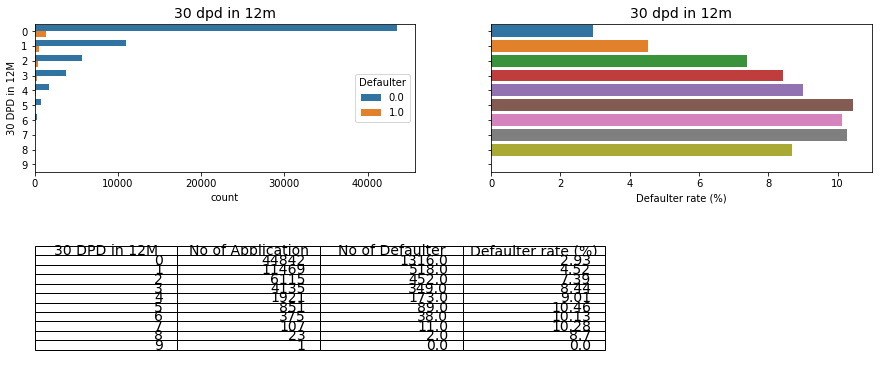

In [407]:
PlotCategoricalFeatures(credit_bureau_df, '90 DPD in 12M')
PlotCategoricalFeatures(credit_bureau_df, '60 DPD in 12M')
PlotCategoricalFeatures(credit_bureau_df, '30 DPD in 12M')

Similare trend like 6M DPD data.<BR>
If applicant crossed 90 DPD mutiple times than there are high chance of defaultor.

**Average Credit Card Utilization in 12M**

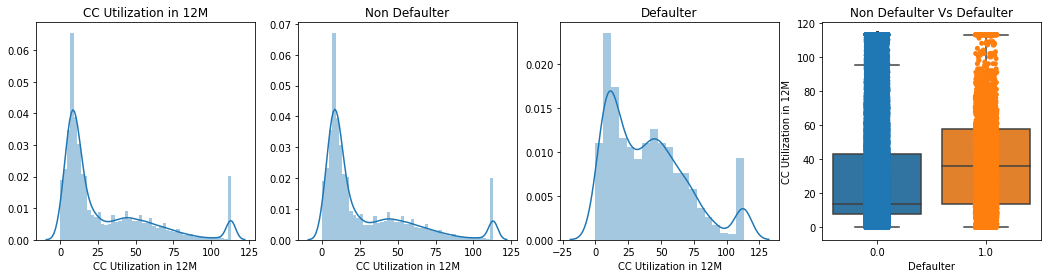

In [372]:
PlotNumericalFeatures(credit_bureau_df, 'CC Utilization in 12M')

**Number of Trades Opened in 6M & Number of Trades Opened in 12M**

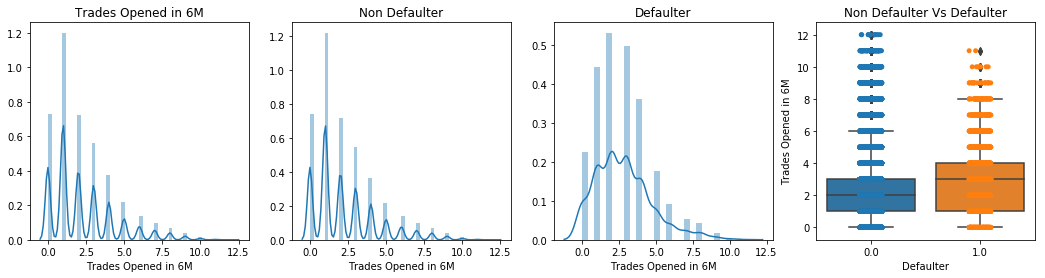

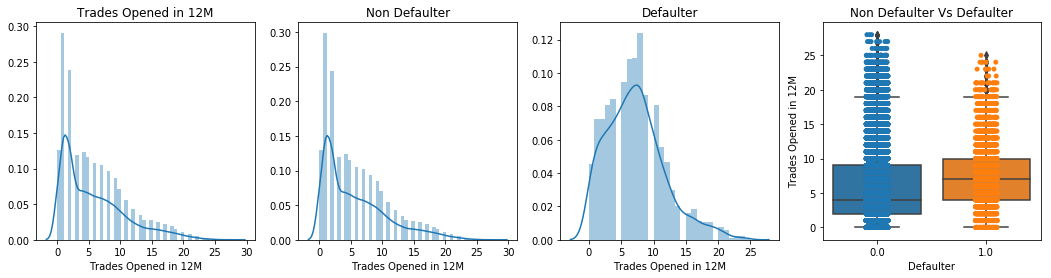

In [409]:
PlotNumericalFeatures(credit_bureau_df, 'Trades Opened in 6M')
PlotNumericalFeatures(credit_bureau_df, 'Trades Opened in 12M')

**Number of PL Trades Opened in 6M & Number of PL Trades Opened in 12M**

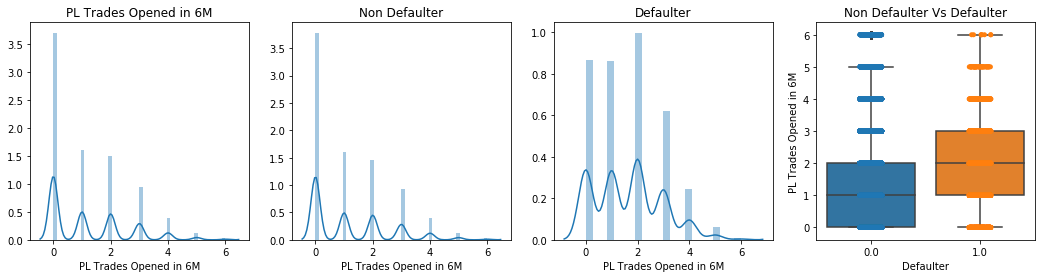

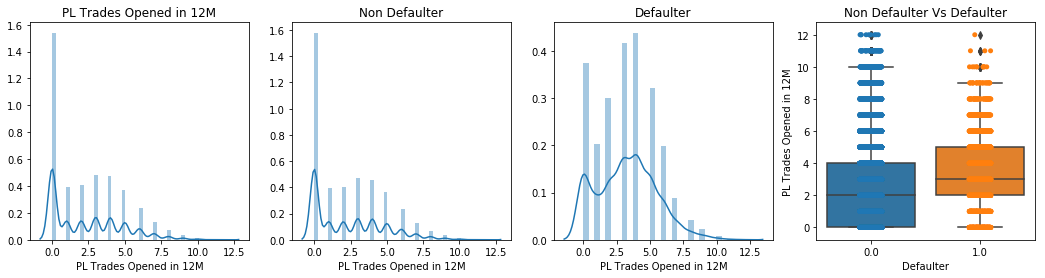

In [385]:
PlotNumericalFeatures(credit_bureau_df, 'PL Trades Opened in 6M')
PlotNumericalFeatures(credit_bureau_df, 'PL Trades Opened in 12M')

**Number of Inquiries in 6M & Number of Inquiries in 12M**

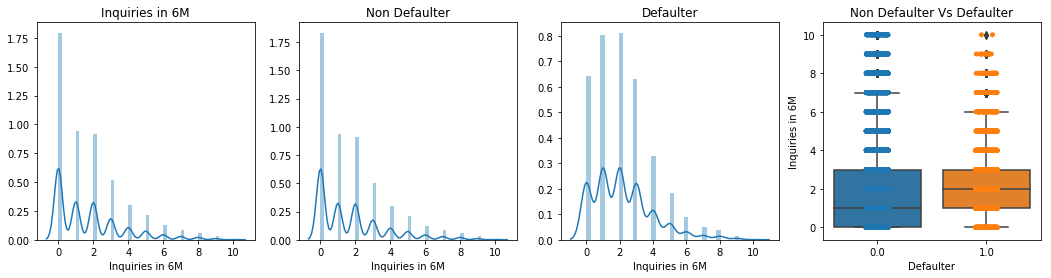

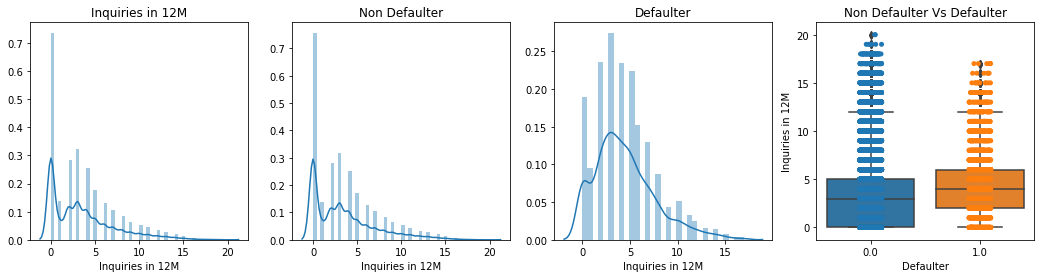

In [386]:
PlotNumericalFeatures(credit_bureau_df, 'Inquiries in 6M')
PlotNumericalFeatures(credit_bureau_df, 'Inquiries in 12M')

**Presence of open home loan**

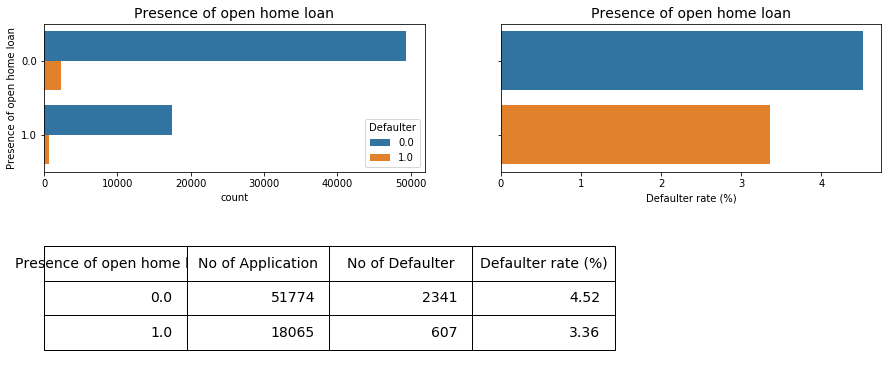

In [387]:
PlotCategoricalFeatures(credit_bureau_df, 'Presence of open home loan')

**Presence of open auto loan**

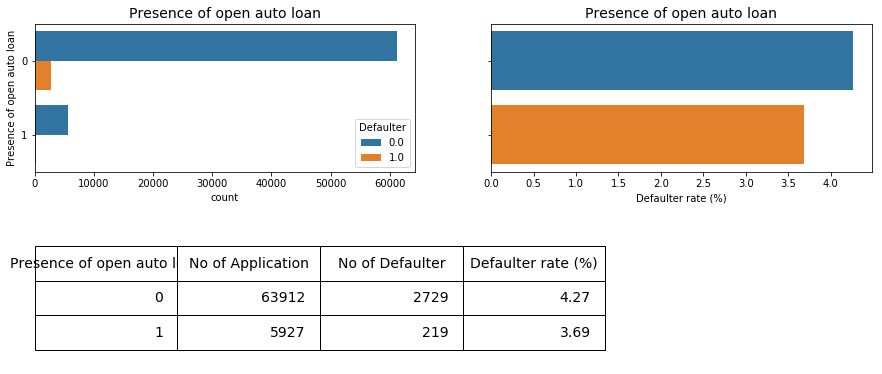

In [390]:
PlotCategoricalFeatures(credit_bureau_df, 'Presence of open auto loan')

**Outstanding Balance**

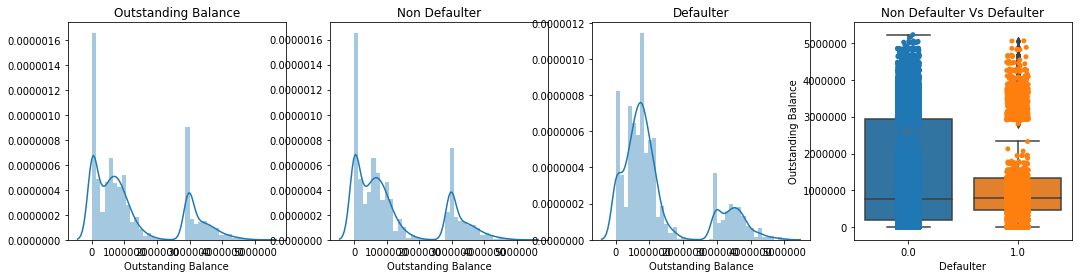

In [388]:
PlotNumericalFeatures(credit_bureau_df, 'Outstanding Balance')

**Total No of Trades**

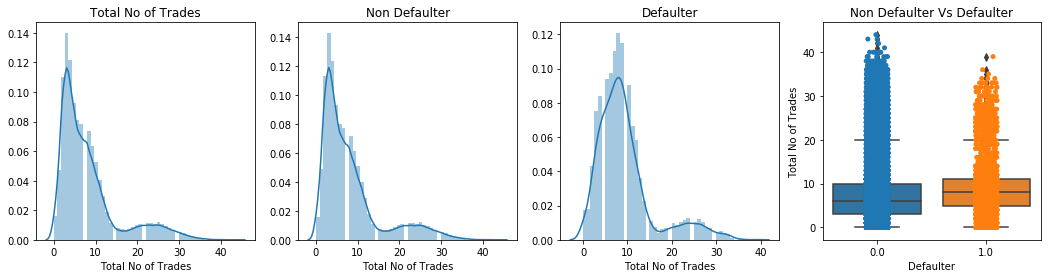

In [389]:
PlotNumericalFeatures(credit_bureau_df, 'Total No of Trades')

In [413]:
demo_graph_credit_bureau_df = pd.merge(demo_graph_df, credit_bureau_df, on='Application ID')

In [414]:
demo_graph_credit_bureau_df.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,...,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [416]:
demo_graph_df.shape

(69839, 12)

In [417]:
credit_bureau_df.shape

(69839, 19)

In [415]:
demo_graph_credit_bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69845 entries, 0 to 69844
Data columns (total 30 columns):
Application ID                 69845 non-null int64
Age                            69845 non-null int64
Gender                         69845 non-null object
Marital Status                 69845 non-null object
No of dependents               69845 non-null float64
Income                         69845 non-null float64
Education                      69845 non-null object
Profession                     69845 non-null object
Type of residence              69845 non-null object
Months in Current Residence    69845 non-null int64
Months in Current Company      69845 non-null int64
Defaulter_x                    69845 non-null float64
90 DPD in 6M                   69845 non-null int64
60 DPD in 6M                   69845 non-null int64
30 DPD in 6M                   69845 non-null int64
90 DPD in 12M                  69845 non-null int64
60 DPD in 12M                  69845 non-null in

Identify **Weight Of Evidance** for feature variables.